In [1]:
import cv2
import os
def process_images(image_folder, label_folder, output_folder, filter_type='bilateral'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(image_folder, filename)
            label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + '.txt')
            
            image = cv2.imread(image_path)
            if image is None:
                print(f"Failed to read image: {image_path}")
                continue

            with open(label_path, 'r') as label_file:
                lines = label_file.readlines()[1:]  # 跳過第一行
                annotations = [tuple(map(float, line.split())) for line in lines]
                image = apply_filter(image, annotations, filter_type)
            base, ext = os.path.splitext(filename)
            output_filename = f"{base}_{filter_type}{ext}"
            output_path = os.path.join(output_folder, output_filename)
            cv2.imwrite(output_path, image)
            print(f"Processed and saved: {output_path}")

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

def apply_filter(image, bbox, filter_type='bilateral'):
    for i in bbox:
        height, width = image.shape[:2]
        x_center, y_center, box_width, box_height = i[0],  i[1],  i[2],  i[3]

        # 將比例轉換為實際像素座標
        x_center = int(x_center * width)
        y_center = int(y_center * height)
        box_width = int(box_width * width)
        box_height = int(box_height * height)

        x_start = max(int(x_center - box_width / 2), 0)
        y_start = max(int(y_center - box_height / 2), 0)
        x_end = min(x_start + box_width, width)
        y_end = min(y_start + box_height, height)

        # 提取子圖
        sub_image = image[y_start:y_end, x_start:x_end]

        if sub_image is None or sub_image.size == 0:
            print("Error: Sub-image is empty.")


        # 根據選擇的濾波器進行處理
        if filter_type == 'bilateral':
            filtered_sub_image = cv2.bilateralFilter(sub_image, d=9, sigmaColor=75, sigmaSpace=75)
        elif filter_type == 'median':
            filtered_sub_image = cv2.medianBlur(sub_image, ksize=13)
        else:
            raise ValueError("Unsupported filter type. Use 'bilateral' or 'median'.")

        # 將處理後的子圖貼回原圖
        image[y_start:y_end, x_start:x_end] = filtered_sub_image
    
    return image

In [41]:
image_folder = 'OD_preliminary/testA'
label_folder = 'OD_preliminary/testA_label'
output_folder = 'm_filter'
process_images(image_folder, label_folder, output_folder, 'median')


Processed and saved: m_filter\levle1_102_median.jpg
Processed and saved: m_filter\levle1_105_median.jpg
Processed and saved: m_filter\levle1_108_median.jpg
Processed and saved: m_filter\levle1_110_median.jpg
Processed and saved: m_filter\levle1_114_median.jpg
Processed and saved: m_filter\levle1_118_median.jpg
Processed and saved: m_filter\levle1_120_median.jpg
Processed and saved: m_filter\levle1_122_median.jpg
Processed and saved: m_filter\levle1_123_median.jpg
Processed and saved: m_filter\levle1_16_median.jpg
Processed and saved: m_filter\levle1_186_median.jpg
Processed and saved: m_filter\levle1_19_median.jpg
Processed and saved: m_filter\levle1_191_median.jpg
Processed and saved: m_filter\levle1_195_median.jpg
Processed and saved: m_filter\levle1_201_median.jpg
Processed and saved: m_filter\levle1_203_median.jpg
Processed and saved: m_filter\levle1_207_median.jpg
Processed and saved: m_filter\levle1_212_median.jpg
Processed and saved: m_filter\levle1_216_median.jpg
Processed and 

In [42]:
image_folder = 'OD_preliminary/testA'
label_folder = 'OD_preliminary/testA_label'
output_folder = 'b_filter'
process_images(image_folder, label_folder, output_folder, 'bilateral')

Processed and saved: b_filter\levle1_102_bilateral.jpg
Processed and saved: b_filter\levle1_105_bilateral.jpg
Processed and saved: b_filter\levle1_108_bilateral.jpg
Processed and saved: b_filter\levle1_110_bilateral.jpg
Processed and saved: b_filter\levle1_114_bilateral.jpg
Processed and saved: b_filter\levle1_118_bilateral.jpg
Processed and saved: b_filter\levle1_120_bilateral.jpg
Processed and saved: b_filter\levle1_122_bilateral.jpg
Processed and saved: b_filter\levle1_123_bilateral.jpg
Processed and saved: b_filter\levle1_16_bilateral.jpg
Processed and saved: b_filter\levle1_186_bilateral.jpg
Processed and saved: b_filter\levle1_19_bilateral.jpg
Processed and saved: b_filter\levle1_191_bilateral.jpg
Processed and saved: b_filter\levle1_195_bilateral.jpg
Processed and saved: b_filter\levle1_201_bilateral.jpg
Processed and saved: b_filter\levle1_203_bilateral.jpg
Processed and saved: b_filter\levle1_207_bilateral.jpg
Processed and saved: b_filter\levle1_212_bilateral.jpg
Processed an

In [3]:
image_folder = 'OD_preliminary/trainA'
image_folder = 'OD_preliminary/trainA_label'
for filename in os.listdir(image_folder):
        if filename.endswith('.jpg'):
            image_path = os.path.join(image_folder, filename)
            label_path = os.path.join(label_folder, os.path.splitext(filename)[0] + '.txt')

(1024, 1024)


(-0.5, 511.5, 511.5, -0.5)

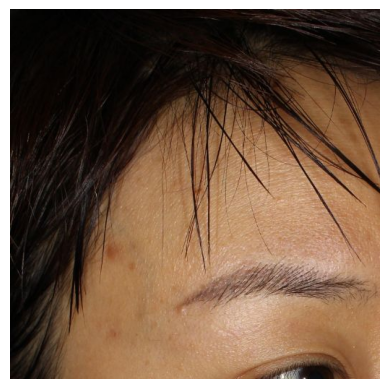

In [5]:
import matplotlib.pyplot as plt
image_path = 'OD_preliminary/trainA\levle0_1.jpg'
img = cv2.imread(image_path)
print(img.shape[:2])
# 提取子圖
cropped = img[0:512, 0:512]
    
# OpenCV 讀取的圖像是 BGR 格式，需要轉換為 RGB 格式以正確顯示
cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    
# 使用 matplotlib 顯示圖像
plt.imshow(cropped_rgb)
plt.axis('off')  # 隱藏坐標軸

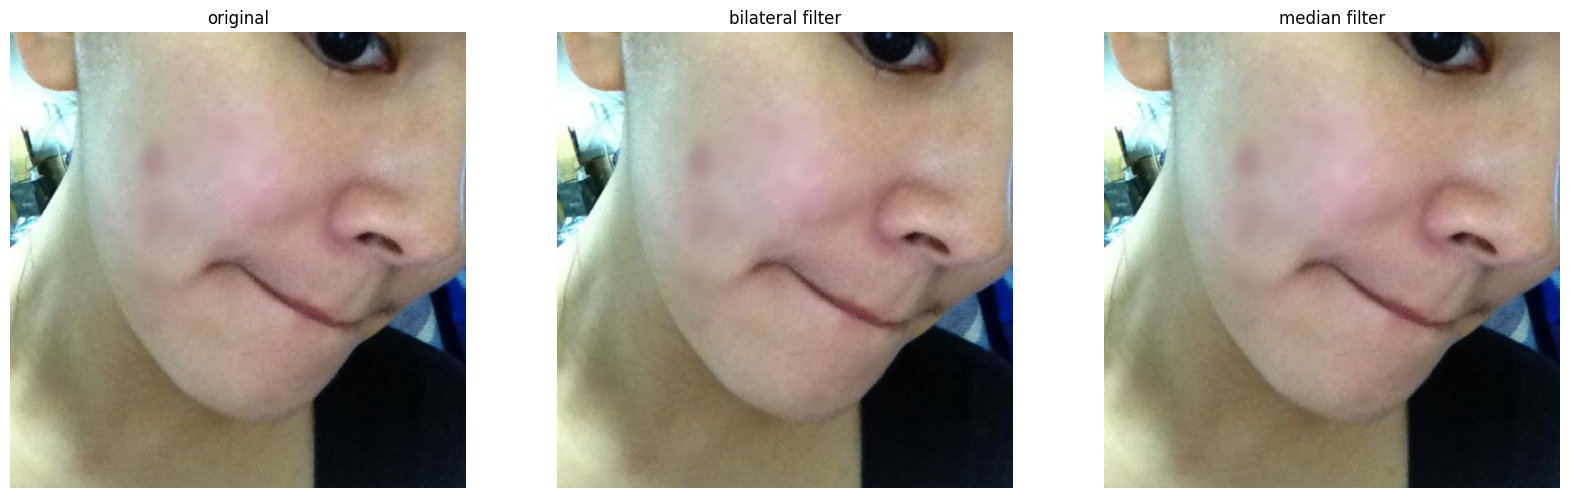

In [15]:
import cv2

# 讀取圖像
image_path = 'OD_preliminary/trainA\levle0_3.jpg'
label_path = 'OD_preliminary/trainA_label\levle0_3.txt'
image1 = cv2.imread(image_path)
with open(label_path, 'r') as label_file:
    lines = label_file.readlines()[1:]  # 跳過第一行
    annotations = [tuple(map(float, line.split())) for line in lines]


image2 = apply_filter(image1, annotations, 'bilateral')
image3 = apply_filter(image1, annotations, 'median')
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
# 使用 matplotlib 顯示圖像
plt.figure(figsize=(20, 10))

# 第一張圖片
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.title('original')
plt.axis('off')  # 隱藏坐標軸

# 第二張圖片
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.title('bilateral filter')
plt.axis('off')  # 隱藏坐標軸

plt.subplot(1, 3, 3)
plt.imshow(image3_rgb)
plt.title('median filter')
plt.axis('off')  # 隱藏坐標軸

# 顯示圖像
plt.show()


In [5]:
image_folder = 'test20/test20_image'
label_folder = 'test20/test20_label'
output_folder = 'm_filter'
process_images(image_folder, label_folder, output_folder, 'median')

Processed and saved: m_filter\forward_101_median.jpg
Processed and saved: m_filter\forward_15_median.jpg
Processed and saved: m_filter\forward_20_median.jpg
Processed and saved: m_filter\forward_21_median.jpg
Processed and saved: m_filter\forward_4_median.jpg
Processed and saved: m_filter\forward_50_median.jpg
Processed and saved: m_filter\forward_65_median.jpg
Processed and saved: m_filter\forward_79_median.jpg
Processed and saved: m_filter\forward_8_median.jpg
Processed and saved: m_filter\forward_83_median.jpg
Processed and saved: m_filter\forward_96_median.jpg
Processed and saved: m_filter\side_19_median.jpg
Processed and saved: m_filter\side_21_median.jpg
Processed and saved: m_filter\side_24_median.jpg
Processed and saved: m_filter\side_37_median.jpg
Processed and saved: m_filter\side_38_median.jpg
Processed and saved: m_filter\side_4_median.jpg
Processed and saved: m_filter\side_42_median.jpg
Processed and saved: m_filter\side_51_median.jpg
Processed and saved: m_filter\side_55_

In [6]:
image_folder = 'test20/test20_image'
label_folder = 'test20/test20_label'
output_folder = 'b_filter'
process_images(image_folder, label_folder, output_folder, 'bilateral')

Processed and saved: b_filter\forward_101_bilateral.jpg
Processed and saved: b_filter\forward_15_bilateral.jpg
Processed and saved: b_filter\forward_20_bilateral.jpg
Processed and saved: b_filter\forward_21_bilateral.jpg
Processed and saved: b_filter\forward_4_bilateral.jpg
Processed and saved: b_filter\forward_50_bilateral.jpg
Processed and saved: b_filter\forward_65_bilateral.jpg
Processed and saved: b_filter\forward_79_bilateral.jpg
Processed and saved: b_filter\forward_8_bilateral.jpg
Processed and saved: b_filter\forward_83_bilateral.jpg
Processed and saved: b_filter\forward_96_bilateral.jpg
Processed and saved: b_filter\side_19_bilateral.jpg
Processed and saved: b_filter\side_21_bilateral.jpg
Processed and saved: b_filter\side_24_bilateral.jpg
Processed and saved: b_filter\side_37_bilateral.jpg
Processed and saved: b_filter\side_38_bilateral.jpg
Processed and saved: b_filter\side_4_bilateral.jpg
Processed and saved: b_filter\side_42_bilateral.jpg
Processed and saved: b_filter\sid